In [13]:
import pandas as pd
from datetime import timedelta, datetime
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns
import prepare as p

import warnings
warnings.filterwarnings("ignore")

# import acquire as a


## Using the OPS data acquired in the Acquire exercises opsd_germany_daily.csv, complete the following:

In [4]:
opsd = pd.read_csv('opsd_germany.csv')

In [8]:
opsd.columns = opsd.columns.str.lower()


## 1. Convert date column to datetime format.

In [12]:
opsd.date = opsd.date.astype('datetime64[ns]')

## 2. Plot the distribution of each of your variables.

In [16]:
opsd.head()

,unnamed: 0,date,consumption,wind,solar,wind+solar
0,0,2006-01-01,1069.184,NaN,NaN,NaN
1,1,2006-01-02,1380.521,NaN,NaN,NaN
2,2,2006-01-03,1442.533,NaN,NaN,NaN
3,3,2006-01-04,1457.217,NaN,NaN,NaN
4,4,2006-01-05,1477.131,NaN,NaN,NaN


Distributions for: unnamed: 0


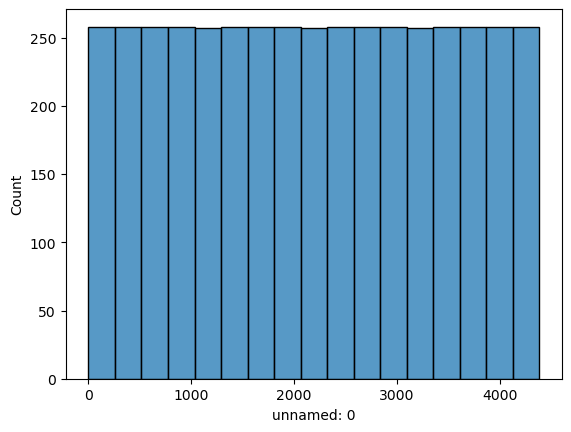

Distributions for: date


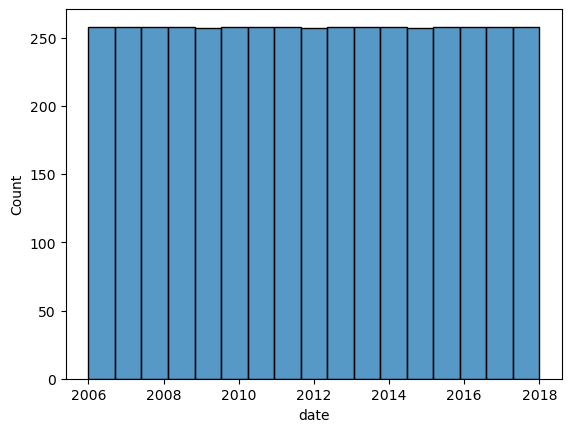

Distributions for: consumption


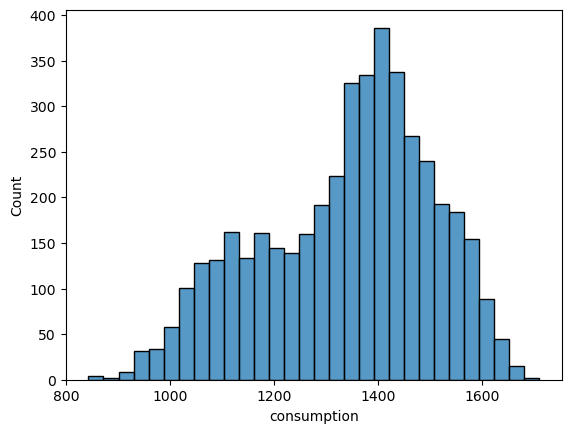

Distributions for: wind


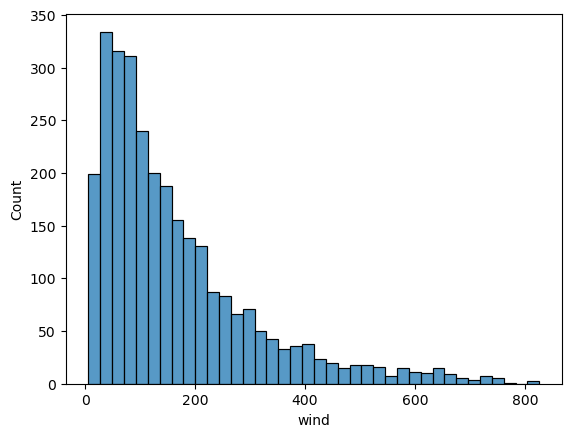

Distributions for: solar


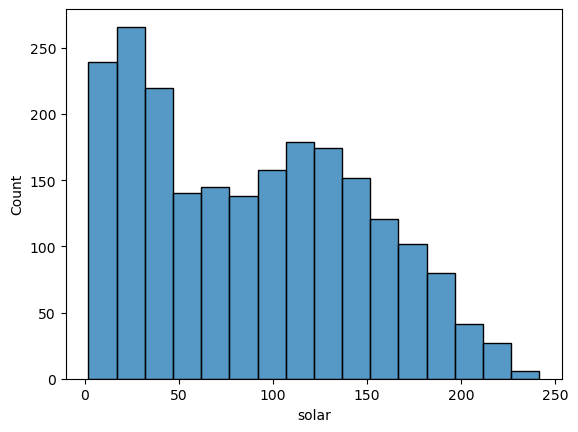

Distributions for: wind+solar


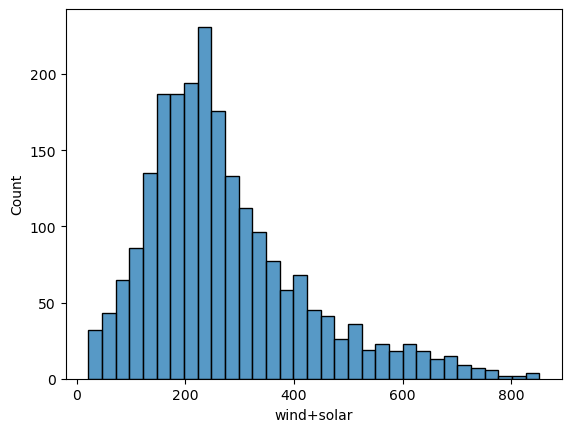

In [18]:
for col in opsd.columns:
    sns.histplot(data=opsd, x=col)
    print(f'Distributions for: {col}')
    plt.show()

## 3. Set the index to be the datetime variable.

In [19]:
opsd = opsd.set_index('date')

## 4. Add a month and a year column to your dataframe.

In [21]:
opsd['month'] = opsd.index.month 
opsd['year'] = opsd.index.year

## 5. Fill any missing values.

In [26]:
opsd.isna().sum()

unnamed: 0     0
consumption    0
wind           0
solar          0
wind+solar     0
month          0
year           0
dtype: int64

In [25]:
opsd.backfill(inplace=True)

## 6. Make sure all the work that you have done above is reproducible. That is, you should put the code above into separate functions and be able to re-run the functions and get the same results.

In [ ]:
opsd = p.prepare_opsd(opsd)